missing values:
 year            0
miles           0
fatalities      0
seatbelt      209
speed65         0
speed70         0
drinkage        0
alcohol         0
income          0
age             0
dtype: int64


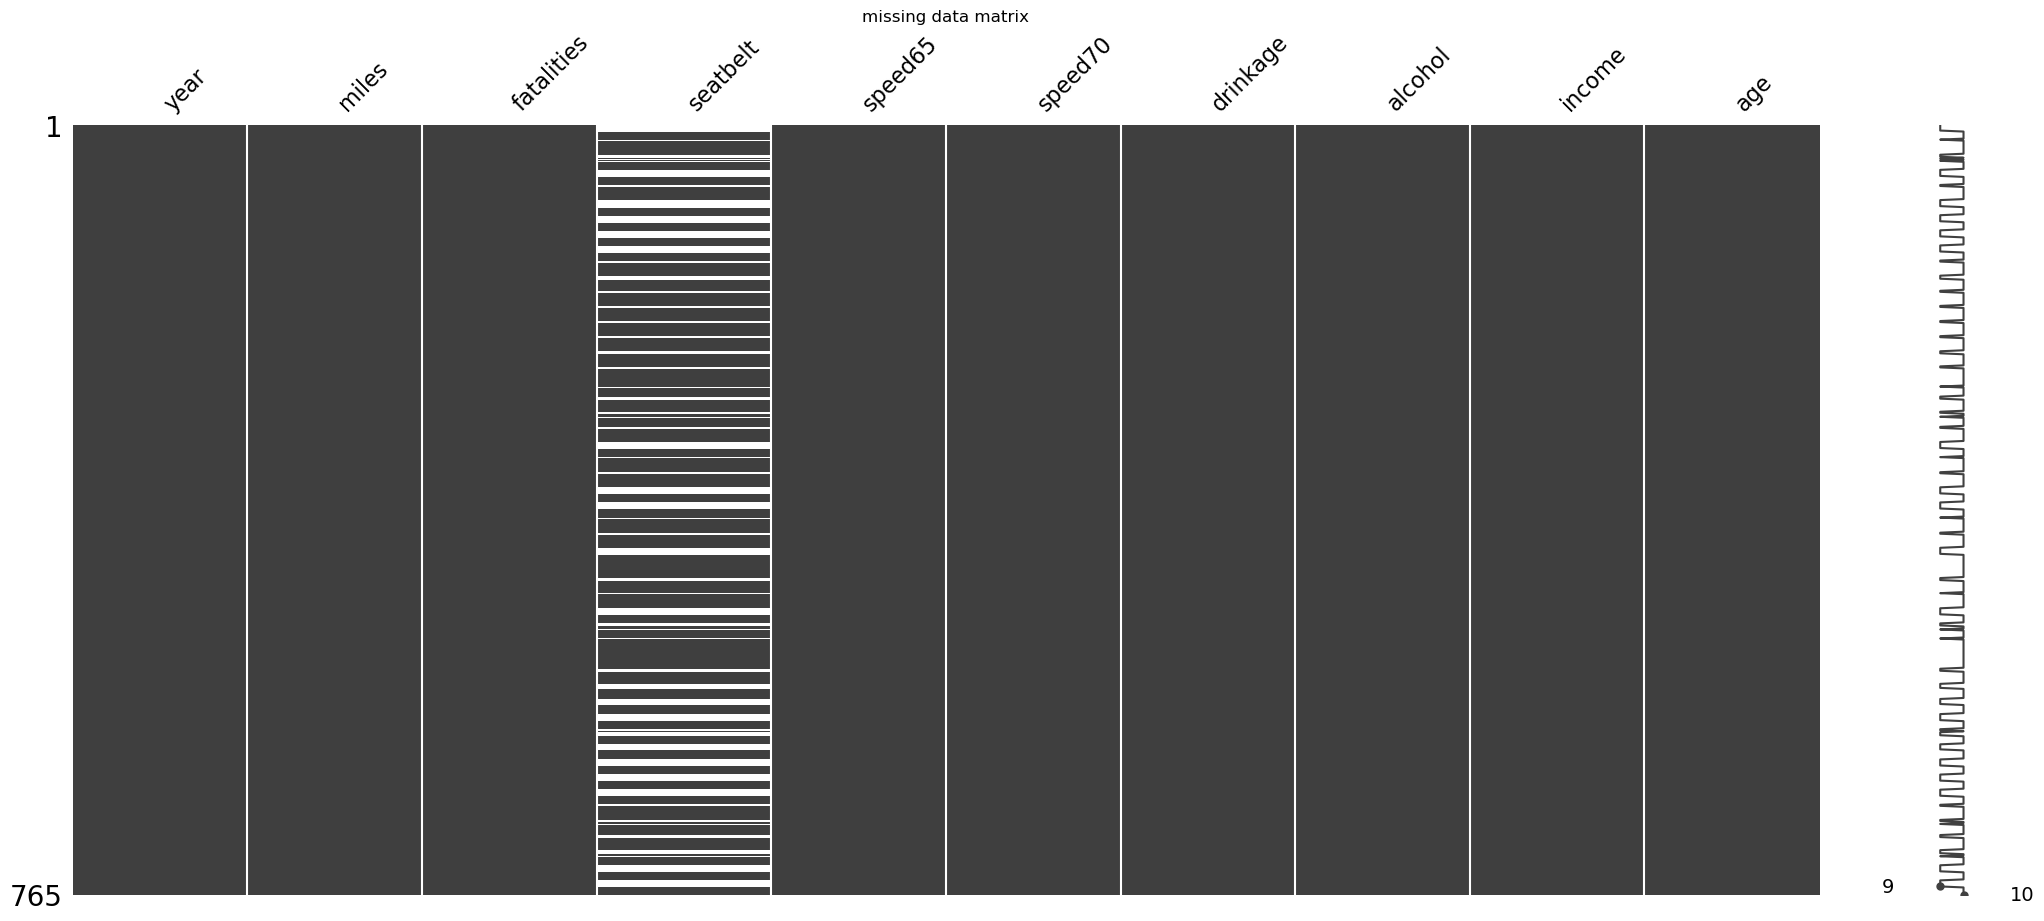

C:\Users\Varshith Reddy\AppData\Local\Temp\ipykernel_5628\3977173937.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


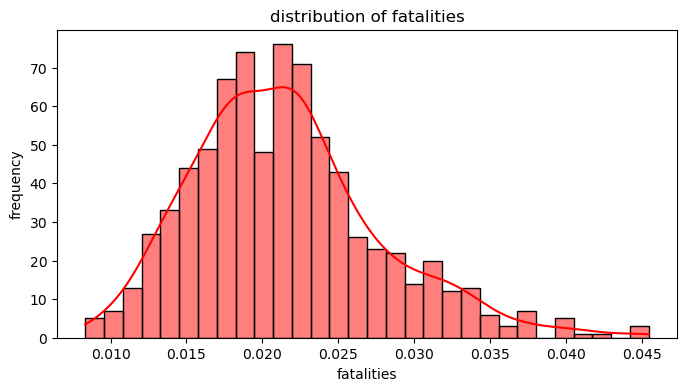

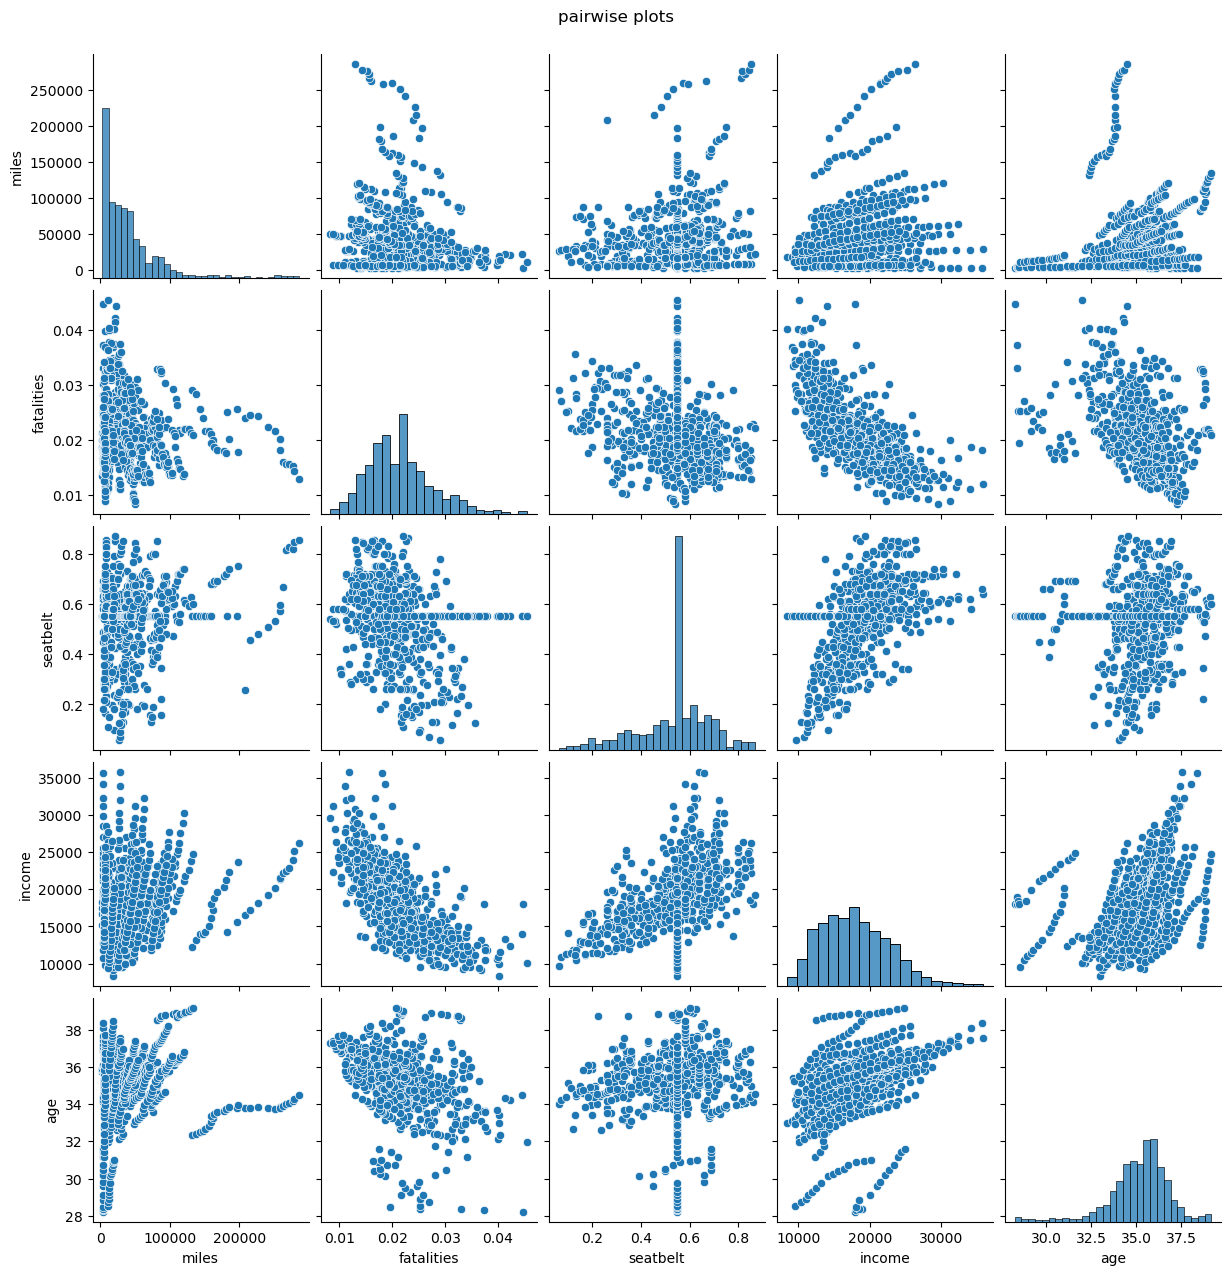

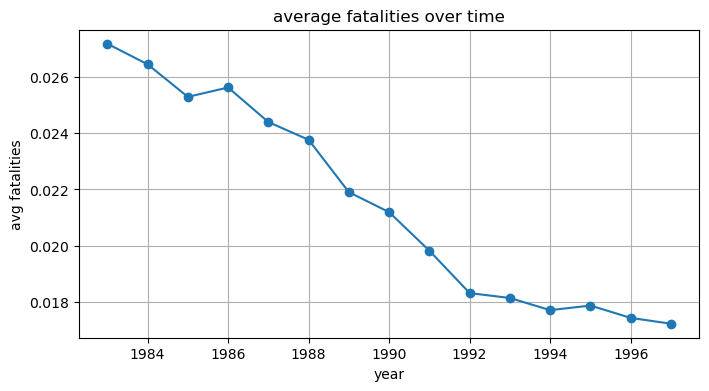

model evaluation:
mae: 0.0031
mse: 0.0000
r²: 0.5677


In [6]:
#21BDS0153

#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#load dataset
df = pd.read_csv("dataset.csv", na_values=["", "NA"])

#drop unnecessary columns
df = df.drop(columns=[col for col in ['rownames', 'state'] if col in df.columns])

#convert yes/no binary columns
binary_cols = ["speed65", "speed70", "drinkage", "alcohol", "enforce"]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

#convert object columns to numeric if needed
for col in df.select_dtypes(include='object').columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#drop constant columns
df = df.loc[:, df.nunique() > 1]

#missing values overview
print("missing values:\n", df.isnull().sum())
msno.matrix(df)
plt.title("missing data matrix")
plt.show()

#impute missing numeric values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

#drop any rows still containing nans
df = df.dropna()

#1d visualization: histogram
if 'fatalities' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['fatalities'], bins=30, kde=True, color='red')
    plt.title("distribution of fatalities")
    plt.xlabel("fatalities")
    plt.ylabel("frequency")
    plt.show()

#2d & nd visualization
numeric_cols = ['miles', 'fatalities', 'seatbelt', 'income', 'age']
numeric_cols = [col for col in numeric_cols if col in df.columns]
if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("pairwise plots", y=1.02)
    plt.show()

#time-series analysis
if 'year' in df.columns and 'fatalities' in df.columns:
    plt.figure(figsize=(8, 4))
    df.groupby('year')['fatalities'].mean().plot(marker='o')
    plt.title("average fatalities over time")
    plt.xlabel("year")
    plt.ylabel("avg fatalities")
    plt.grid(True)
    plt.show()

#dimensionality reduction (pca)
X = df.drop(columns='fatalities') if 'fatalities' in df.columns else df.copy()
y = df['fatalities'] if 'fatalities' in df.columns else None

#remove zero variance columns
X = X.loc[:, X.std() > 0]

#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#evaluation
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("model evaluation:")
print(f"mae: {mae:.4f}")
print(f"mse: {mse:.4f}")
print(f"r²: {r2:.4f}")


In [4]:
!pip install pandas numpy matplotlib seaborn missingno scikit-learn


  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
